# Deep Learning - A relatively basic approach (sklearn)

A lot of the cool applications of AI has been done NOT using the ML models that we've seen so far. They are done using a technique called Deep Learning. Deep learning is based on the concept of Neural Networks. Examples of neural networks:

- Image Recognition and generation

- Object Detection 

- Natural Language Processing

- Generating New (visual) data

- Automatic Creation of Graphics 

- Generating Music Tracks

- Etc.


In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

#I'm using sklearn for NN <- this is not the best implementation, you should use keras instead
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

In [3]:
#really, really small dataset for this
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer['data'], breast_cancer['target'])

In [4]:
breast_cancer
print(breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,19.530,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,0.1792,0.06552,...,25.93,26.24,171.10,2053.0,0.1495,0.41160,0.61210,0.19800,0.2968,0.09929
1,12.760,13.37,82.29,504.1,0.08794,0.07948,0.04052,0.02548,0.1601,0.06140,...,14.19,16.40,92.04,618.8,0.1194,0.22080,0.17690,0.08411,0.2564,0.08253
2,16.130,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,20.96,31.48,136.80,1315.0,0.1789,0.42330,0.47840,0.20730,0.3706,0.11420
3,12.780,16.49,81.37,502.5,0.09831,0.05234,0.03653,0.02864,0.1590,0.05653,...,13.46,19.76,85.67,554.9,0.1296,0.07061,0.10390,0.05882,0.2383,0.06410
4,18.220,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,0.2092,0.06310,...,20.60,24.13,135.10,1321.0,0.1280,0.22970,0.26230,0.13250,0.3021,0.07987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.01504,0.1717,0.06899,...,10.41,31.56,67.03,330.7,0.1548,0.16640,0.09412,0.06517,0.2878,0.09211
422,13.650,13.16,87.88,568.9,0.09646,0.08711,0.03888,0.02563,0.1360,0.06344,...,15.34,16.35,99.71,706.2,0.1311,0.24740,0.17590,0.08056,0.2380,0.08718
423,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
424,12.320,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.12660,0.12420,0.09391,0.2827,0.06771


In [6]:
from sklearn import preprocessing
# applying standardization to my dataset
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# multi layer perceptron (MLP) classifier, 2x15 neuron hidden layers,  (perceptron is one of the layers dealing with the neurons)
# solver = stochastic gradient descent (don't worry about this for now)
# verbose -> how much the model "speaks" back to us. 
#            Very useful to have when learning, very useful to shut up when we know what we are doing
# max_iter -> how many "epochs" we run, i.e. how many times do we see all the data
nn = MLPClassifier(hidden_layer_sizes= (15,15), solver='sgd', verbose=10, max_iter=500, random_state=1) # 2 hidden layers with 15 neurons each



In [8]:
%%time
nn.fit(X_train, y_train)

print("Training set score: %f" % nn.score(X_train, y_train))
print("Test set score: %f" % nn.score(X_test, y_test))

Iteration 1, loss = 0.80319051
Iteration 2, loss = 0.79494961
Iteration 3, loss = 0.78220751
Iteration 4, loss = 0.76726389
Iteration 5, loss = 0.74995593
Iteration 6, loss = 0.73067822
Iteration 7, loss = 0.71132355
Iteration 8, loss = 0.69294242
Iteration 9, loss = 0.67531877
Iteration 10, loss = 0.65848037
Iteration 11, loss = 0.64323447
Iteration 12, loss = 0.62880158
Iteration 13, loss = 0.61567496
Iteration 14, loss = 0.60330305
Iteration 15, loss = 0.59173941
Iteration 16, loss = 0.58024437
Iteration 17, loss = 0.56932441
Iteration 18, loss = 0.55909645
Iteration 19, loss = 0.54945953
Iteration 20, loss = 0.53985348
Iteration 21, loss = 0.53067702
Iteration 22, loss = 0.52183545
Iteration 23, loss = 0.51320407
Iteration 24, loss = 0.50472172
Iteration 25, loss = 0.49628258
Iteration 26, loss = 0.48808643
Iteration 27, loss = 0.48003702
Iteration 28, loss = 0.47221665
Iteration 29, loss = 0.46456196
Iteration 30, loss = 0.45717435
Iteration 31, loss = 0.44983237
Iteration 32, los

Iteration 281, loss = 0.09808150
Iteration 282, loss = 0.09787941
Iteration 283, loss = 0.09770303
Iteration 284, loss = 0.09749896
Iteration 285, loss = 0.09729686
Iteration 286, loss = 0.09709085
Iteration 287, loss = 0.09689463
Iteration 288, loss = 0.09670451
Iteration 289, loss = 0.09649423
Iteration 290, loss = 0.09630855
Iteration 291, loss = 0.09610388
Iteration 292, loss = 0.09587889
Iteration 293, loss = 0.09568958
Iteration 294, loss = 0.09549162
Iteration 295, loss = 0.09529996
Iteration 296, loss = 0.09511072
Iteration 297, loss = 0.09492106
Iteration 298, loss = 0.09473367
Iteration 299, loss = 0.09455206
Iteration 300, loss = 0.09437857
Iteration 301, loss = 0.09420464
Iteration 302, loss = 0.09403916
Iteration 303, loss = 0.09386754
Iteration 304, loss = 0.09369214
Iteration 305, loss = 0.09351770
Iteration 306, loss = 0.09333855
Iteration 307, loss = 0.09317934
Iteration 308, loss = 0.09301068
Iteration 309, loss = 0.09285959
Iteration 310, loss = 0.09269587
Iteration 

# With a more serious library: tensorflow/keras

In [11]:
!pip install keras --user
!pip install tensorflow --user

     |████████████████████████████████| 1.7 MB 988 kB/s eta 0:00:01
     |████████████████████████████████| 241.2 MB 3.2 kB/s eta 0:00:01   |                                | 593 kB 305 kB/s eta 0:13:09     |██▍                             | 18.0 MB 903 kB/s eta 0:04:08     |██▌                             | 19.0 MB 842 kB/s eta 0:04:24     |██▋                             | 19.8 MB 1.0 MB/s eta 0:03:41     |██▊                             | 20.2 MB 1.0 MB/s eta 0:03:40     |████▉                           | 36.7 MB 507 kB/s eta 0:06:43     |█████▏                          | 38.8 MB 719 kB/s eta 0:04:42     |██████                          | 45.2 MB 747 kB/s eta 0:04:23     |██████▉                         | 51.3 MB 867 kB/s eta 0:03:39     |███████▊                        | 58.5 MB 823 kB/s eta 0:03:42     |███████▉                        | 58.7 MB 504 kB/s eta 0:06:02     |████████                        | 60.9 MB 1.1 MB/s eta 0:02:43     |██████████                      | 75.5 MB 1.

     |████████████████████████████████| 151 kB 1.6 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.python import tf2 # tensorflow and keras are the deep learning modules. tensorflow is the underlying engine to build the models
from keras.models import Sequential #keras is the user-friendly convenient interface for tensorflow, and it specifies the structure of the model
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical


2022-10-25 13:29:26.869477: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
#import mnist # no longer works - contains a hard coded reference to the datafile
#  instead: download mnist.npz from https://www.kaggle.com/vikramtiwari/mnist-numpy

def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

(train_images, train_labels), (test_images, test_labels) = load_data('mnist.npz') # we turn the data into train and test sets


In [14]:
train_images[0] # each row of values corresponds to 28 values (between 0 and 255)
#len(train_images)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

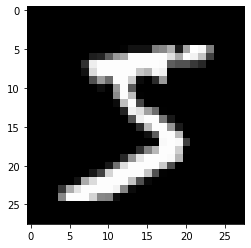

5

(28, 28)

In [15]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap = 'gray') #imshow visualizes the values as an image (gray for gray colormap). 0 correponds to black and 1 corr to white
plt.show()
display(train_labels[0])
display(train_images[0].shape)

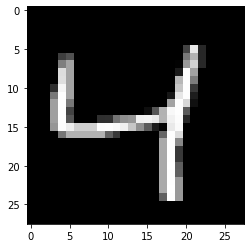

4

(28, 28)

In [16]:
plt.imshow(train_images[2], cmap = 'gray')
plt.show()
display(train_labels[2])
display(train_images[2].shape)

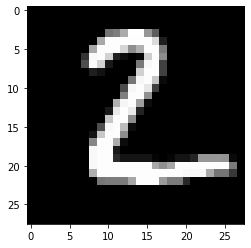

2

(28, 28)

In [17]:
plt.imshow(test_images[1], cmap = 'gray')
plt.show()
display(test_labels[1])
display(test_images[1].shape)

In [18]:
# Normalize and flatten the images. It works better for backpropagation # Normalize between 0 and 1 (NO Standard scaling)
# You could use the minmaxscaler
train_images = (train_images / 255) # we know that 255 is the max number = the range of the 8bit data
test_images_original = test_images
test_images = (test_images / 255)

# Flatten the images. Images are to be input as vector
train_images = train_images.reshape((-1, 784)) # reshape a 2d image to a 1d array. 784= 28*28
test_images = test_images.reshape((-1, 784))

# Note that these vecors here are images, but they could be sound recordings, just regular rows from a dataset, anything.



In [19]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
# Build the model. WHAT are we building...
model = Sequential([ # as far as we know, all networks are sequential
  Dense(64, activation='relu', input_shape=(784,)), # first hidden layer # input layer is represented in the first hidden layer # 784= 28*28 dense networks means all neurons in one layer are connected to all neurons of the next layer
  Dense(64, activation='relu'),      # second hidden layer # choosing relu instead of sigmoid, this is somewhat common
  Dense(10, activation='softmax'),   # output layer. the softmax actiavation is the last one to compensate for the high volume additions
])

# Compile the model. HOW are we building...
model.compile(
  optimizer='adam', #here we could use stochastic gradient descent, but adam is a de facto standard
  loss='categorical_crossentropy', #this is how we create the original blame to play the blame game
  metrics=['accuracy'],
)

# Train the model. ACTUALLY building...
history = model.fit(
  train_images,
  to_categorical(train_labels), # just to make sure the outputs are not considered numeric (because, ya know, they are numbers...)
  epochs=20, # go 20 times through the whole dataset
  batch_size=32, # send 32 images at a time before you tweak the network again, to make it faster
)

# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

2022-10-25 13:47:15.549566: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
1875/1875 [==============================] - 22s 9ms/step - loss: 0.2699 - accuracy: 0.9219
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1259 - accuracy: 0.9621
Epoch 3/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0920 - accuracy: 0.9724
Epoch 4/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0741 - accuracy: 0.9767
Epoch 5/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0600 - accuracy: 0.9813
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0516 - accuracy: 0.9836
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0434 - accuracy: 0.9858
Epoch 8/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0369 - accuracy: 0.9879
Epoch 9/20
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0325 - accuracy: 0.9892
Epoch 10/20
1875/1875 [==============================] - 17s 9ms/step 

[0.14057475328445435, 0.9749000072479248]

In [21]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 
predictions

1/1 [==============================] - 1s 1s/step
[7 2 1 0 4]


array([[2.90739720e-12, 2.05193881e-13, 1.25562921e-10, 1.84747734e-07,
        1.86369085e-14, 7.86043453e-11, 3.94709061e-21, 9.99999762e-01,
        3.04101709e-11, 1.41410720e-11],
       [2.22667767e-22, 4.12090229e-09, 1.00000000e+00, 7.54672413e-09,
        4.26485396e-32, 6.10895165e-19, 5.92343310e-21, 1.19524910e-18,
        1.41394135e-17, 6.91192530e-27],
       [1.29790340e-15, 9.99882102e-01, 1.70064965e-07, 1.55488866e-09,
        2.69095035e-09, 3.85617689e-08, 4.69869292e-06, 2.86346562e-06,
        1.10079156e-04, 3.87993859e-09],
       [1.00000000e+00, 2.02648733e-20, 5.15899086e-12, 4.73391248e-12,
        8.85383957e-22, 1.90963942e-17, 1.74723734e-13, 5.38568653e-18,
        7.39335479e-19, 3.25402310e-14],
       [3.13341310e-17, 1.74775914e-14, 8.08478339e-13, 1.16141907e-15,
        9.99999642e-01, 8.00084791e-15, 2.57284098e-15, 7.74921360e-12,
        4.71474205e-13, 3.97952533e-07]], dtype=float32)

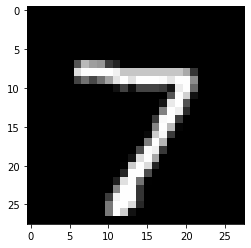

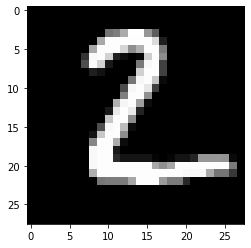

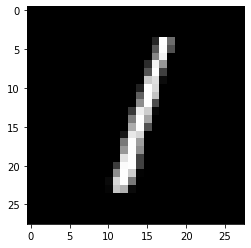

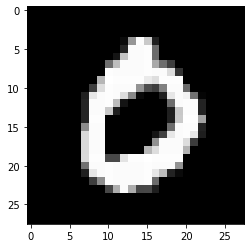

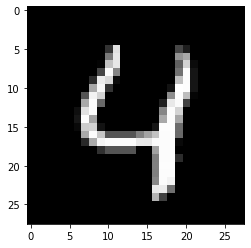

In [22]:
for i in range(5):
  plt.imshow(test_images_original[i], cmap = 'gray')
  plt.show()

In [23]:
#predict on all images:
predictions_all = model.predict(test_images)

wrong_pred = [i for i in range(len(predictions_all)) if np.argmax(predictions_all[i]) != test_labels[i]]

313/313 [==============================] - 3s 9ms/step


In [24]:
wrong_pred

[8,
 18,
 115,
 149,
 158,
 217,
 247,
 259,
 266,
 274,
 290,
 320,
 321,
 340,
 445,
 447,
 448,
 495,
 557,
 582,
 619,
 674,
 684,
 810,
 877,
 900,
 947,
 956,
 1003,
 1014,
 1039,
 1044,
 1156,
 1182,
 1217,
 1224,
 1226,
 1242,
 1247,
 1248,
 1260,
 1281,
 1299,
 1319,
 1328,
 1393,
 1425,
 1482,
 1500,
 1527,
 1530,
 1549,
 1554,
 1581,
 1609,
 1621,
 1634,
 1681,
 1691,
 1695,
 1709,
 1717,
 1737,
 1751,
 1754,
 1790,
 1800,
 1828,
 1901,
 1910,
 1982,
 2004,
 2018,
 2024,
 2033,
 2035,
 2053,
 2073,
 2098,
 2109,
 2118,
 2182,
 2224,
 2266,
 2272,
 2387,
 2408,
 2426,
 2454,
 2488,
 2514,
 2525,
 2526,
 2582,
 2597,
 2607,
 2648,
 2654,
 2713,
 2720,
 2730,
 2758,
 2810,
 2921,
 2927,
 2939,
 2970,
 3005,
 3030,
 3073,
 3117,
 3225,
 3336,
 3369,
 3375,
 3422,
 3475,
 3503,
 3520,
 3550,
 3558,
 3567,
 3597,
 3681,
 3727,
 3751,
 3780,
 3808,
 3811,
 3818,
 3838,
 3853,
 3869,
 3893,
 3926,
 3941,
 3943,
 3985,
 4065,
 4075,
 4140,
 4163,
 4176,
 4177,
 4199,
 4201,
 4248,
 4

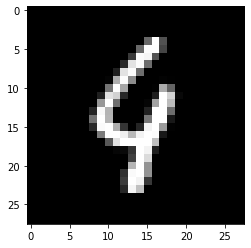

Prediction: 9, Actual: 4.


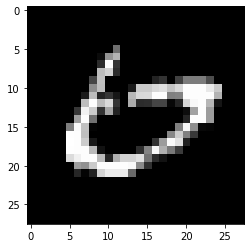

Prediction: 0, Actual: 6.


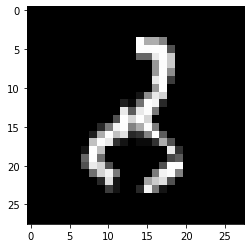

Prediction: 2, Actual: 8.


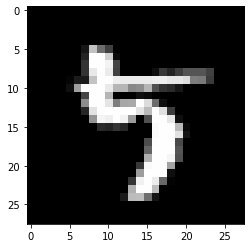

Prediction: 5, Actual: 5.


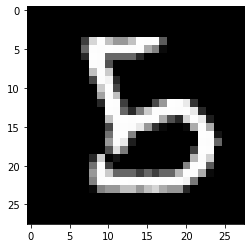

Prediction: 5, Actual: 5.


In [25]:
for i in [115, 445, 582, 951, 720]:
    plt.imshow(test_images_original[i], cmap = 'gray')
    plt.show()
    print(f'Prediction: {np.argmax(predictions_all[i])}, Actual: {test_labels[i]}.')


In [ ]:
import tensorflow
import keras

In [ ]:
keras.__version__